**Predict Survival by using Titanic Data**

# EDA (Exporatory Data Analysis)

*#* Let's explore the data to see which columns we will use to predict survival.

## Load Titanic Train dataset

In [208]:
tTrain <- read.csv("./Data/titanic/train.csv")
head(tTrain)
tail(tTrain)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


## Data Exporation

In [209]:
str(tTrain)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [ ]:
dim(tTrain)

data.frame:	891 obs. of  12 variables:
 - PassengerId: int 
 - Survived   : int   
 - Pclass     : int    
 - Name       : Factor w/ 891 levels   
 - Sex        : Factor w/ 2 levels "female","male"  
 - Age        : num    
 - SibSp      : int    
 - Parch      : int    
 - Ticket     : Factor w/ 681 levels   
 - Fare       : num    
 - Cabin      : Factor w/ 148 levels   
 - Embarked   : Factor w/ 4 levels   

### orderBy "targets"

In [210]:
library(doBy)

In [ ]:
tTrain.order <- orderBy(~Survived, tTrain)
head(tTrain.order)

### reset rownames

In [211]:
rownames(tTrain.order) <- c()
head(tTrain.order)
tail(tTrain.order)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
3,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
5,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
6,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


### Explore the target column

#### Proportion of target data

In [212]:
victimCount   <- sum(tTrain.order$Survived == 0)
survivorCount <- sum(tTrain.order$Survived == 1)
totalCount    =  victimCount + survivorCount

## Alternatively ##
# victimCount   <- nrow(subset(tTrain.order, Survived == 0))
# survivorCount <- nrow(subset(tTrain.order, Survived == 1))
# totalCount    =  victimCount + survivorCount

victimCount ; survivorCount ; totalCount

[1] 549

[1] 342

[1] 891

In [213]:
labelVec <- c("Victims", "Survivors")
SurvivedVec <- c(victimCount, survivorCount)
SurvivedVec  # This is a vector SurvivedVec [1] ; SurvivedVec [2]

[1] 549 342

In [214]:
ratio <- round((SurvivedVec/totalCount) * 100, 2)
ratio

[1] 61.62 38.38

##### pie3D

In [215]:
library(plotrix)

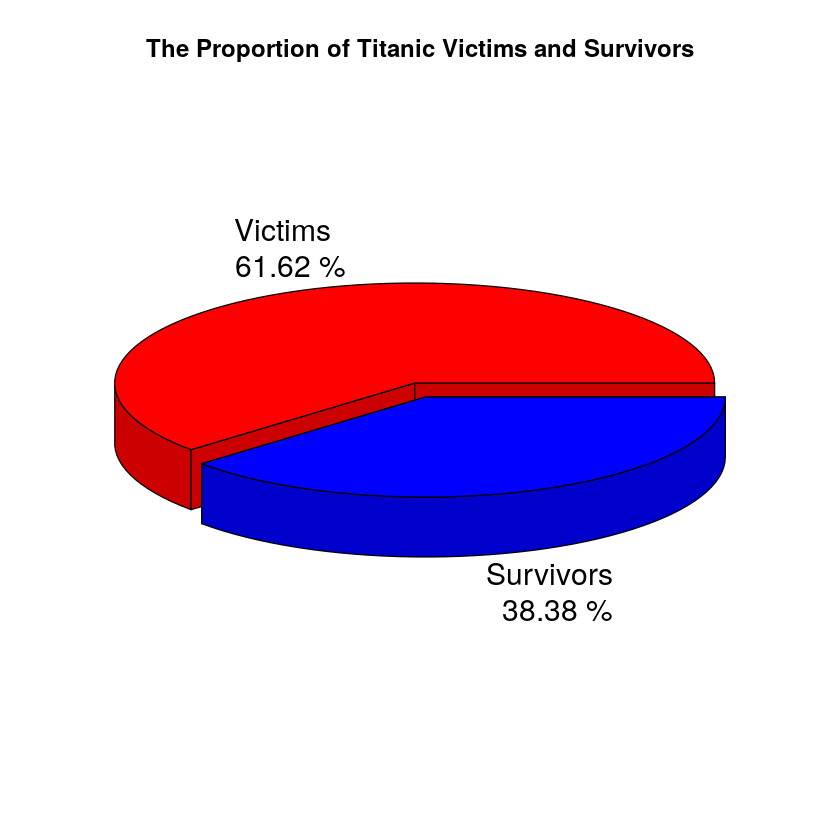

In [216]:
label = paste(labelVec, "\n", ratio, "%")

pie3D(SurvivedVec,
      main = "The Proportion of Titanic Victims and Survivors",
      labels = label,
      col = c("red","blue"),
      explode = 0.05)

## Alternatively, ## 
# pie3D(SurvivedVec,
#       main = "The Proportion of Titanic Victims and Survivors",
#       labels = paste(labelVec, "\n", ratio, "%"),
#       col = c("red","blue"),
#       explode = 0.05)

##### barplot

In [217]:
tableBar <- table(tTrain.order$Survived)  # the best way to draw barchart is to use table
tableBar


  0   1 
549 342 

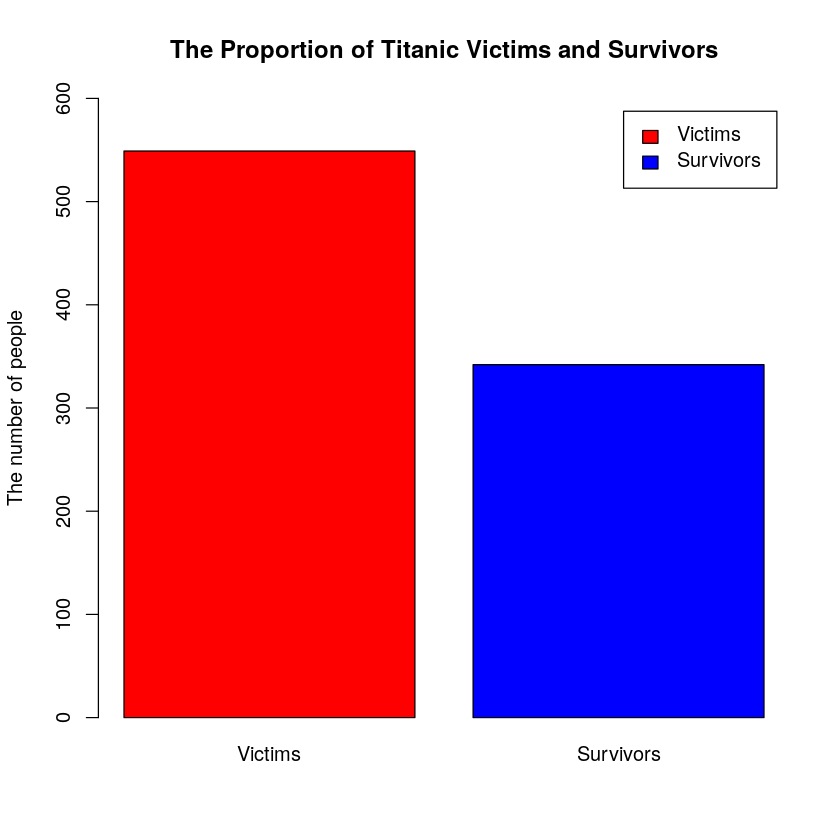

In [218]:
labelVS = c("Victims", "Survivors")

barplot(tableBar,
        main = "The Proportion of Titanic Victims and Survivors",
#       xlab = "Victims and Survivors",
        ylab = "The number of people",
        ylim = c(0,600),
        names.arg = labelVS,
        legend.text = labelVS,
        col = c("red","blue"))

*#* Survived column will be our target that we are going to predict whether people are survived or not with trained machine learning models.

*#* The proportion of victims and survivors are 61.62% and 38.38%. This is okay to proceed analysis because it is not extremely skewed like 95%: 5%. However, we should see if it is worth analyzing data with same proportions.

#### Define trainData by examing each column

In [219]:
str(tTrain.order)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


##### Survived by Pclass?

In [220]:
str(tTrain.order$Pclass)

 int [1:891] 3 3 3 1 3 3 3 3 3 3 ...


In [221]:
table(is.na(tTrain.order$Pclass)) # to check whether this column contains NA


FALSE 
  891 

In [222]:
# Count each pClass

table(tTrain.order$Pclass) # Simple
pClass1Count <- table(tTrain.order$Pclass)[1]
pClass2Count <- table(tTrain.order$Pclass)[2]
pClass3Count <- table(tTrain.order$Pclass)[3]

## Alternatively, ##
# pClass1Count   <- sum(tTrain.order$Pclass == 1) # == "1" also works
# pClass2Count   <- sum(tTrain.order$Pclass == 2)
# pClass3Count   <- sum(tTrain.order$Pclass == 3)

## or ##
# pClass1Count   <- nrow(subset(tTrain.order, Pclass == 1))
# pClass2Count   <- nrow(subset(tTrain.order, Pclass == 2))
# pClass3Count   <- nrow(subset(tTrain.order, Pclass == 3))

pClass1Count ; pClass2Count ; pClass3Count


  1   2   3 
216 184 491 

1 
216

2 
184

3 
491

In [223]:
pClass1.Victim   = nrow(subset(tTrain.order, Pclass == 1 & Survived == 0))
pClass1.Survivor = nrow(subset(tTrain.order, Pclass == 1 & Survived == 1))

pClass2.Victim   = nrow(subset(tTrain.order, Pclass == 2 & Survived == 0))
pClass2.Survivor = nrow(subset(tTrain.order, Pclass == 2 & Survived == 1))

pClass3.Victim   = nrow(subset(tTrain.order, Pclass == 3 & Survived == 0))
pClass3.Survivor = nrow(subset(tTrain.order, Pclass == 3 & Survived == 1))

In [224]:
paste(pClass1.Victim, pClass1.Survivor)
paste(pClass2.Victim, pClass2.Survivor)
paste(pClass2.Victim, pClass3.Survivor)

[1] "80 136"

[1] "97 87"

[1] "97 119"

*#* pClass1.Victim < pClass1.Survivor  
*#* pClass2.Victim > pClass2.Survivor  
*#* pClass3.Victim > pClass3.Survivor  
*#* The porportion of survived passengers in Class 1 execeed that of victims, while the class 2 and 3 shows the opposite results. It can be used for trainData.

=> Use in trainData

##### Survived by Name?

In [225]:
str(tTrain.order$Name)

 Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...


*#* We can hardly find any connection bewteen different names (characters) on Name column and our target(Survived column). So, we will not use name as a column in trainData.

=> No use in trainData

##### Survived by Sex?

In [226]:
str(tTrain.order$Sex)

 Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...


In [227]:
table(is.na(tTrain.order$Sex)) # to check whether this column contains NA


FALSE 
  891 

In [228]:
# Count female and male
table(tTrain.order$Sex)

femaleCount <- sum(tTrain.order$Sex == "female")
maleCount   <- sum(tTrain.order$Sex == "male")

## Alternatively,##
# femaleCount <- nrow(subset(tTrain.order, Sex == "female"))
# maleCount   <- nrow(subset(tTrain.order, Sex == "male"))

## or ##

# femaleCount <- table(tTrain.order$Sex)[1]
# maleCount   <- table(tTrain.order$Sex)[2]

paste(femaleCount, maleCount)


female   male 
   314    577 

[1] "314 577"

In [229]:
female.Victim   = nrow(subset(tTrain.order, Sex == "female" & Survived == 0))
female.Survivor = nrow(subset(tTrain.order, Sex == "female" & Survived == 1))

male.Victim   = nrow(subset(tTrain.order, Sex == "male" & Survived == 0))
male.Survivor = nrow(subset(tTrain.order, Sex == "male" & Survived == 1))

In [230]:
paste(female.Victim, female.Survivor)
paste(male.Victim, male.Survivor)

[1] "81 233"

[1] "468 109"

In [231]:
print("female")
cat(paste("death rate of female:",    round(female.Victim  /femaleCount * 100, 2), "%", "\n"))
cat(paste("survival rate of female:", round(female.Survivor/femaleCount * 100, 2), "%", "\n", "\n"))

print("male")
cat(paste("death rate of male:",    round(male.Victim  /maleCount * 100, 2), "%", "\n"))
cat(paste("survival rate of male:", round(male.Survivor/maleCount * 100, 2), "%", "\n"))

[1] "female"
death rate of female: 25.8 % 
survival rate of female: 74.2 % 
 
[1] "male"
death rate of male: 81.11 % 
survival rate of male: 18.89 % 


In [232]:
femaleVec <- c(female.Victim, female.Survivor)
maleVec   <- c(male.Victim, male.Survivor)

fRatio <- round(femaleVec  /femaleCount * 100, 2)
mRatio <- round(maleVec  /maleCount * 100, 2)

fRatio ; mRatio

[1] 25.8 74.2

[1] 81.11 18.89

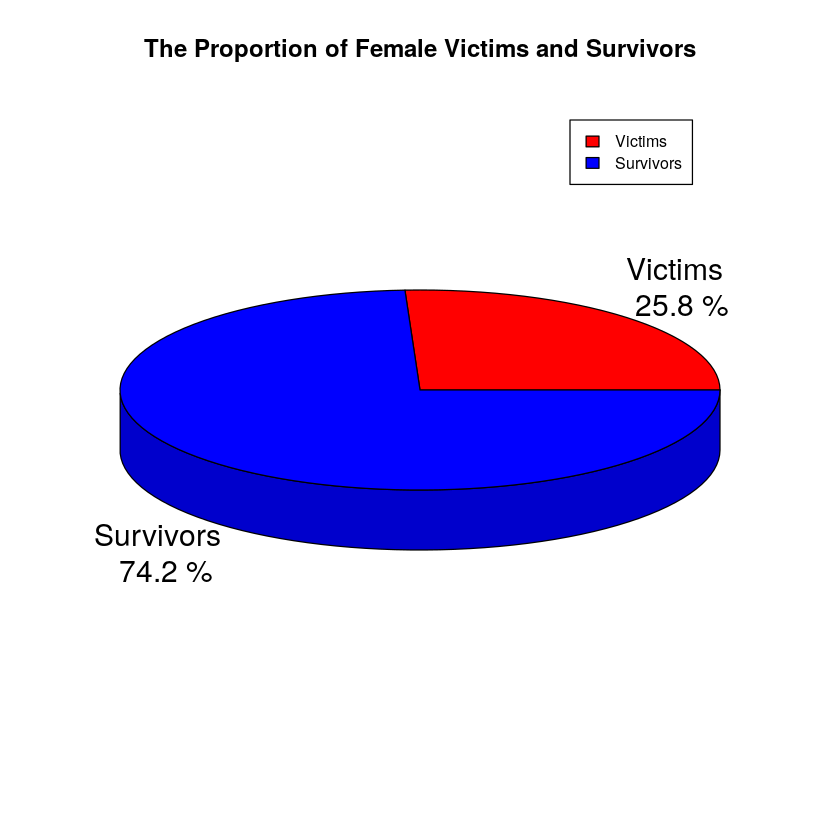

In [233]:
labelFemale = paste(labelVec, "\n", fRatio, "%")

pie3D(fRatio,
      main = "The Proportion of Female Victims and Survivors",
      labels = labelFemale,
#      explode = 0.05,
      col = c("red", "blue"),
     )

legend(0.5, 1,
       labelVS,
       cex = 0.8,
       fill = c("red", "blue")
      )

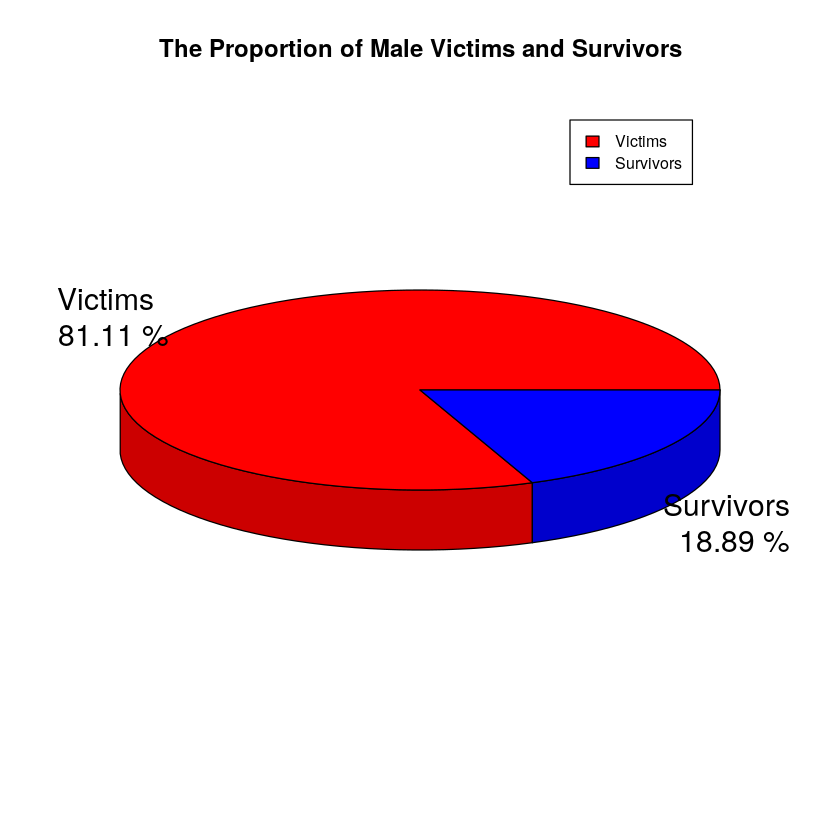

In [234]:
labelMale = paste(labelVec, "\n", mRatio, "%")

pie3D(mRatio,
      main = "The Proportion of Male Victims and Survivors",
      labels = labelMale,
#      explode = 0.05,
      col = c("red", "blue")
     )

legend(0.5, 1,
       labelVS,
       cex = 0.8,
       fill = c("red", "blue")
      )

*#* The survival rate of female (74.20%) is much higher than that of male (18.89%).  
=> Use in trainData

##### Survived by Age?

In [235]:
str(tTrain.order$Age)

 num [1:891] 22 35 NA 54 2 20 39 14 2 31 ...


In [236]:
table(is.na(tTrain.order$Age))


FALSE  TRUE 
  714   177 

In [237]:
round(table(is.na(tTrain.order$Age))[2]/
      (table(is.na(tTrain.order$Age))[1] + table(is.na(tTrain.order$Age))[2]) * 100, 2)

TRUE 
19.87

*#* approx. 20% of Age data is missing. So, it is not proper to use in trainData.

=> No use in trainData












###### Where are the age data missing the most?

Let's also have a look at Pclass, Sex, and Embarked with regards to missing values.  
(It does not make sense to see tables in uncategorized columns like SibSp, Parch, Ticket, Fare, and Cabin, because it does not show us any pattern.)

by Pclass

In [238]:
table(tTrainORD$Pclass, is.na(tTrain.order$Age)) # to check whether this column contains NA

ERROR: Error in table(tTrainORD$Pclass, is.na(tTrain.order$Age)): object 'tTrainORD' not found


In [239]:
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[1,2])*100,2)
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[2,2])*100,2)
round(table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,2]/
      (table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,1]+table(tTrain.order$Pclass, is.na(tTrain.order$Age))[3,2])*100,2)

[1] 13.89

[1] 5.98

[1] 27.7

by Sex

In [240]:
table(tTrain.order$Sex, is.na(tTrain.order$Age)) # to check whether this column contains NA

        
         FALSE TRUE
  female   261   53
  male     453  124

In [241]:
round(table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,2]/
      (table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,1]+table(tTrain.order$Sex, is.na(tTrain.order$Age))[1,2])*100,2)
round(table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Sex, is.na(tTrain.order$Age))[2,2])*100,2)

[1] 16.88

[1] 21.49

by Embarked

In [242]:
table(tTrain.order$Embarked, is.na(tTrain.order$Age))

   
    FALSE TRUE
        2    0
  C   130   38
  Q    28   49
  S   554   90

In [243]:
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[2,2])*100,2)
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[3,2])*100,2)
round(table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,2]/
      (table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,1]+table(tTrain.order$Embarked, is.na(tTrain.order$Age))[4,2])*100,2)

[1] 22.62

[1] 63.64

[1] 13.98

*#* About 64% (without two missing values in Embarked) Age data in Embarked Q is missing.

In [244]:
str(tTrain.order)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 559 520 629 734 29 847 687 846 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


##### Survived by SipSp

In [245]:
str(tTrain.order$SibSp)

 int [1:891] 1 0 0 0 3 0 1 0 4 1 ...


=> No use in trainData

###### Survived by Parch

In [246]:
str(tTrain.order$Parch)

 int [1:891] 0 0 0 0 1 0 5 0 1 0 ...


=> No use in trainData

###### Survived by Ticket

In [247]:
str(tTrain.order$Ticket)

 Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...


=> No use in trainData

###### Survived by Fare

In [248]:
str(tTrain.order$Fare)
summary(tTrain.order$Fare)

 num [1:891] 7.25 8.05 8.46 51.86 21.07 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.91   14.45   32.20   31.00  512.33 

In [249]:
# table((cut(tTrain.order$Fare, breaks = seq(0, 520), right = F)), tTrain.order$Pclass)

In [250]:
cor.test(tTrain.order$Fare, tTrain.order$Pclass)


	Pearson's product-moment correlation

data:  tTrain.order$Fare and tTrain.order$Pclass
t = -19.61, df = 889, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5937488 -0.5019370
sample estimates:
       cor 
-0.5494996 


*#* moderate negative relationship with Pclass as cor is -0.55.

In [251]:
cor.test(tTrain.order$Fare, tTrain.order$Survived) # 


	Pearson's product-moment correlation

data:  tTrain.order$Fare and tTrain.order$Survived
t = 7.9392, df = 889, p-value = 6.12e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1949232 0.3176165
sample estimates:
      cor 
0.2573065 


*#* However, fare is not correlated to Survived. Fare probably subject to the number of luggages, embarked place, age, etc.

=> Let's run models with/without fare to see which one is better!

###### Survived by Cabin

In [252]:
str(tTrain.order$Cabin)

 Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...


In [253]:
# table(tTrainORD$Cabin)
table(tTrain.order$Cabin)[1]

687

In [254]:
table(tTrain.order$Cabin)[1]/totalCount

0.7710438

*#* There are too many missing data in Cabin column (77.1%).

=> No use in trainData

###### Survived by Embarked?

In [255]:
str(tTrain.order$Embarked) 
unique(tTrain.order$Embarked) 

 Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


[1] S Q C  
Levels:  C Q S

In [256]:
table(tTrain.order$Embarked)


      C   Q   S 
  2 168  77 644 

In [257]:
table(tTrain.order$Survived, tTrain.order$Embarked)

   
          C   Q   S
  0   0  75  47 427
  1   2  93  30 217

In [258]:
table(tTrain.order$Sex, tTrain.order$Embarked)

        
               C   Q   S
  female   2  73  36 203
  male     0  95  41 441

In [ ]:
subset(tTrain.order, Embarked == "") #
## Alternatively ##
# train_df[train_df$Embarked == "",] 

=> use in trainData

=> So, we will use these columns : Survived, Pclass, (Fare), Sex, and Embarked.

# Data Restructuring

## Select only relevant columns

In [259]:
trainData_col <- c("Survived", "Pclass", "Fare", "Sex", "Embarked")
trainData <- tTrain.order[trainData_col]
head(trainData)

,Survived,Pclass,Fare,Sex,Embarked
,<int>,<int>,<dbl>,<fct>,<fct>
1,0,3,7.2500,male,S
2,0,3,8.0500,male,S
3,0,3,8.4583,male,Q
4,0,1,51.8625,male,S
5,0,3,21.0750,male,S
6,0,3,8.0500,male,S


## Convert characters into numbers

In [260]:
trainData$SexCode[trainData$Sex == "male"] <- 0   # add SexCode column
trainData$SexCode[trainData$Sex == "female"] <- 1
head(trainData)

,Survived,Pclass,Fare,Sex,Embarked,SexCode
,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
1,0,3,7.2500,male,S,0
2,0,3,8.0500,male,S,0
3,0,3,8.4583,male,Q,0
4,0,1,51.8625,male,S,0
5,0,3,21.0750,male,S,0
6,0,3,8.0500,male,S,0


In [261]:
str(trainData)

'data.frame':	891 obs. of  6 variables:
 $ Survived: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Fare    : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...
 $ SexCode : num  0 0 0 0 0 0 0 1 0 1 ...


## Convert integer into factor for target value

Otherwise, some Machine Learning tools like randomForest might guess Survived as a number.

In [262]:
trainData$Survived <- as.factor(trainData$Survived)
str(trainData)

'data.frame':	891 obs. of  6 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Fare    : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...
 $ SexCode : num  0 0 0 0 0 0 0 1 0 1 ...


## Reselect only relevant columns

In [263]:
trainData_col_code <- c("Survived", "Pclass", "Fare", "SexCode", "Embarked") #to exclude Sex
trainData <- trainData[trainData_col_code]

## Handle missing values

Here we can see missing values in Embarked.

### Check the column

In [264]:
table(trainData$Embarked)

## Alternatively, ##
# sum(trainData$Embarked == "")
# sum(trainData$Embarked == "C")
# sum(trainData$Embarked == "Q")
# sum(trainData$Embarked == "S")

round(table(trainData$Embarked)/sum(table(trainData$Embarked))*100,2)


      C   Q   S 
  2 168  77 644 


          C     Q     S 
 0.22 18.86  8.64 72.28 

Since the majority of 'Embarked' is S, we may want to simply plug S in the missing values.
Before we just do it, we can also guess the values from other components with Machine Learning tools.

In [265]:
# Plug-in
# trainData$Embarked[trainData$Embarked == ""] <- "S"

### Machine Learning for missing values: (1) Data Handling

#### orderBy Embarked and reset rownames

In [266]:
trainData.ORD <- orderBy(~Embarked, trainData)
rownames(trainData.ORD) <- c()
head(trainData.ORD)

,Survived,Pclass,Fare,SexCode,Embarked
,<fct>,<int>,<dbl>,<dbl>,<fct>
1,1,1,80.0000,1,
2,1,1,80.0000,1,
3,0,3,7.2250,0,C
4,0,1,27.7208,0,C
5,0,1,82.1708,0,C
6,0,3,7.8958,0,C


#### Spilit the data into missing vs. non-missing data and reset rownames

In [267]:
missing.Embarked  <- subset(trainData.ORD, Embarked == "")   # 2 columns
nonmissing.Embarked <- subset(trainData.ORD, !Embarked == "") # 889 columns
rownames(nonmissing.Embarked) <- c()

missing.Embarked
head(nonmissing.Embarked)

,Survived,Pclass,Fare,SexCode,Embarked
,<fct>,<int>,<dbl>,<dbl>,<fct>
1,1,1,80,1,
2,1,1,80,1,


,Survived,Pclass,Fare,SexCode,Embarked
,<fct>,<int>,<dbl>,<dbl>,<fct>
1,0,3,7.2250,0,C
2,0,1,27.7208,0,C
3,0,1,82.1708,0,C
4,0,3,7.8958,0,C
5,0,3,21.6792,0,C
6,0,1,61.9792,0,C


#### Split the data into train vs. test sets with non-missing data

In [268]:
nrow(subset(nonmissing.Embarked, Embarked == "C")) # 1 - 168
nrow(subset(nonmissing.Embarked, Embarked == "Q")) # 169-245
nrow(subset(nonmissing.Embarked, Embarked == "S")) # 246-889

# head(nonmissing.Embarked, 169)
# tail(nonmissing.Embarked, 645)

[1] 168

[1] 77

[1] 644

In [269]:
# 7:3 
nrow(subset(nonmissing.Embarked, Embarked == "C")) * 0.7 # 118
nrow(subset(nonmissing.Embarked, Embarked == "Q")) * 0.7 # 54
nrow(subset(nonmissing.Embarked, Embarked == "S")) * 0.7 # 451

[1] 117.6

[1] 53.9

[1] 450.8

In [270]:
# sampling
set.seed(12) # i.e. 12, 123, 1234
emSamp <- c(sample(1:168, 118), sample(169:245, 54), sample(246:889,451)) 
dataEm.train <- nonmissing.Embarked[emSamp,]
dataEm.test  <- nonmissing.Embarked[-emSamp,]

#### Update factor

In [271]:
# update factor
dataEm.train$Embarked <- factor(dataEm.train$Embarked) 
dataEm.test$Embarked <- factor(dataEm.test$Embarked) 
unique(dataEm.train$Embarked) # make sure if "" is removed
unique(dataEm.test$Embarked)

[1] C Q S
Levels: C Q S

[1] C Q S
Levels: C Q S

In [272]:
summary(dataEm.train)

 Survived     Pclass           Fare            SexCode       Embarked
 0:387    Min.   :1.000   Min.   :  0.000   Min.   :0.0000   C:118   
 1:236    1st Qu.:1.000   1st Qu.:  7.896   1st Qu.:0.0000   Q: 54   
          Median :3.000   Median : 14.454   Median :0.0000   S:451   
          Mean   :2.289   Mean   : 32.351   Mean   :0.3435           
          3rd Qu.:3.000   3rd Qu.: 30.500   3rd Qu.:1.0000           
          Max.   :3.000   Max.   :512.329   Max.   :1.0000           

In [ ]:
str(dataEm.train)

#### Create trainData and targets

In [273]:
features.Em <- subset(dataEm.test, select = -Embarked) # test the trained model
targets.Em  <- subset(dataEm.test, select = Embarked)  # answer

### Machine Learning for missing values (2) Implementation

We will run five different machine learning tools to get proper values for missing values in column Embarked.

#### Setting

In [274]:
data = dataEm.train             # train: data contains questions and answers 
feature = features.Em           # question data
target = targets.Em$Embarked    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Embarked ~ Pclass + SexCode + Fare + Survived # cTree

In [275]:
head(features.Em)

,Survived,Pclass,Fare,SexCode
,<fct>,<int>,<dbl>,<dbl>
9,0,1,27.7208,0
11,0,1,34.6542,0
17,0,2,15.0458,0
21,0,1,30.6958,0
23,0,2,15.0500,0
24,0,3,7.2250,0


#### randomForest

In [276]:
library(party)
library(caret)
library(e1071)
library(randomForest)

In [277]:
##### Training

rf <- randomForest(Embarked ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_C <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_Q <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)
rf.Result_S <- round((rf.table[3,3])/sum(rf.table[,3])*100, 2)

#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (C)      ", rf.Result_C, "%"), "\n")
cat(paste("randomForest (Q)      ", rf.Result_Q, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")


Call:
 randomForest(formula = Embarked ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 22.47%
Confusion matrix:
   C  Q   S class.error
C 28  0  90  0.76271186
Q  1 28  25  0.48148148
S 17  7 427  0.05321508

    target
pred   C   Q   S
   C  15   0   3
   Q   0  15   1
   S  35   8 189

randomForest (total)   82.33 % 
randomForest (C)       30 % 
randomForest (Q)       65.22 % 
randomForest (S)       97.93 % 


#### nnet Neural Networks

In [278]:
library(nnet)

In [279]:
#### Trainning
nnmodel <- nnet(Embarked ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")
pred

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_C <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_Q <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)
nnet.Result_S <- round((nnet.table[3,3])/sum(nnet.table[,3])*100, 2)

#### Summary
cat(paste("randomForest (total)      ", nnet.Result, "%"),"\n")
cat(paste("randomForest (C)          ", nnet.Result_C, "%"), "\n")
cat(paste("randomForest (Q)          ", nnet.Result_Q, "%"), "\n")
cat(paste("randomForest (S)          ", nnet.Result_S, "%"), "\n")

# weights:  59
initial  value 591.180737 
iter  10 value 452.160023
iter  20 value 429.282633
iter  30 value 416.004561
iter  40 value 410.462041
iter  50 value 406.939708
iter  60 value 404.784683
iter  70 value 403.528308
iter  80 value 403.477892
iter  90 value 403.157789
iter 100 value 403.100875
final  value 403.100875 
stopped after 100 iterations


a 4-7-3 network with 59 weights
inputs: Survived1 Pclass Fare SexCode 
output(s): Embarked 
options were - softmax modelling 

[1] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S"
 [19] "S" "C" "S" "S" "S" "Q" "S" "S" "C" "S" "S" "S" "C" "S" "C" "C" "C" "C"
 [37] "S" "S" "S" "S" "S" "C" "C" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S"
 [55] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [73] "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [91] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[109] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[127] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[145] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[163] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[181] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[199] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[217] "C" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "S" "S" "Q" "S" "S" "S" "S"
[235] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S"
[253] "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "C" "S"

    target
pred   C   Q   S
   C  11   0   7
   Q   1   0   1
   S  38  23 185

randomForest (total)       73.68 % 
randomForest (C)           22 % 
randomForest (Q)           0 % 
randomForest (S)           95.85 % 


#### SVM

In [280]:
#### Traing
svmmodel <- svm(Embarked ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_C <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_Q <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)
svm.Result_S <- round((svm.table[3,3])/sum(svm.table[,3])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (C)                   ", svm.Result_C, "%"), "\n")
cat(paste("SVM (Q)                   ", svm.Result_Q, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Embarked ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  356


    target
pred   C   Q   S
   C   0   0   1
   Q   0   0   0
   S  50  23 192

SVM (total)                72.18 % 
SVM (C)                    0 % 
SVM (Q)                    0 % 
SVM (S)                    99.48 % 


#### cTree

In [281]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_C <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_Q <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)
ct.Result_S <- round((ct.table[3,3])/sum(ct.table[,3])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (C)                 ", ct.Result_C, "%"), "\n")
cat(paste("cTree (Q)                 ", ct.Result_Q, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   C   Q   S
   C  16   0  16
   Q   0   0   0
   S  34  23 177

cTree (total)              72.56 % 
cTree (C)                  32 % 
cTree (Q)                  0 % 
cTree (S)                  91.71 % 


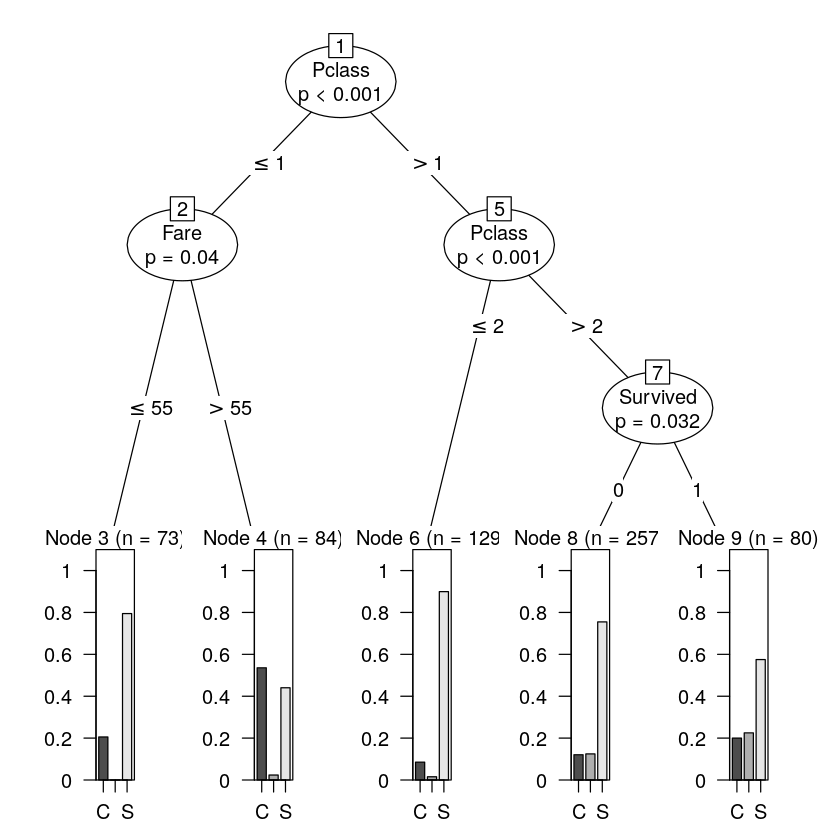

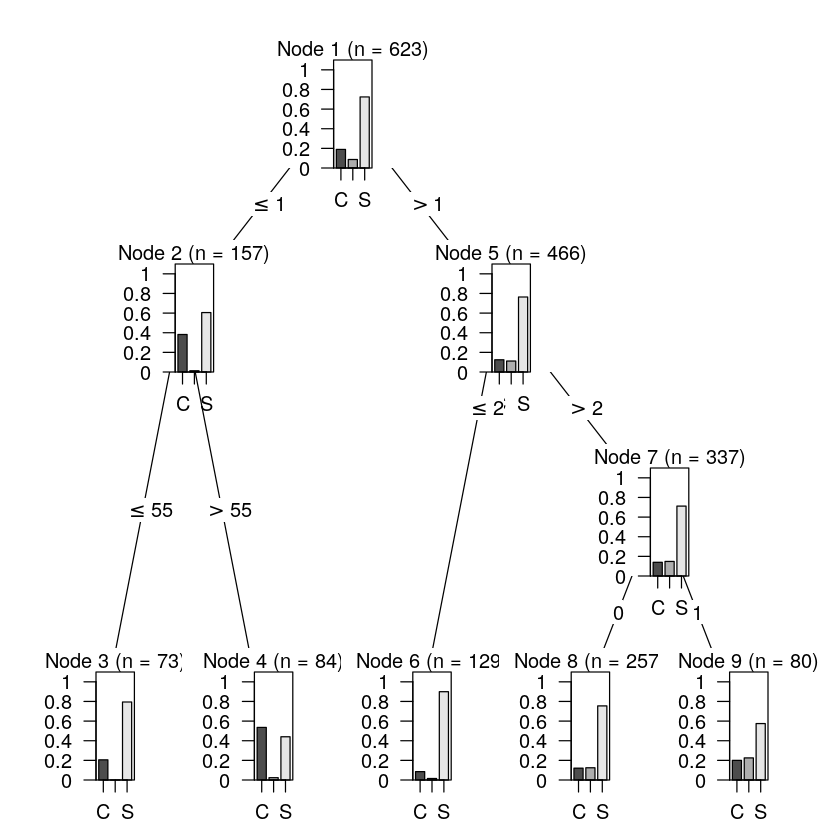

In [282]:
#### Visualization of cTree
plot(ctmodel, 
    )

plot(ctmodel,
     inner_panel = node_barplot,
     #edge_panel = function(...) invisible(),
     tnex = 1)

#### Logistic Regression

In [283]:
##### Training

logistRegModel <- multinom(Embarked ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_C <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_Q <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)
lr.Result_S <- round((lr.table[3,3])/sum(lr.table[,3])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (C)     ", lr.Result_C, "%"), "\n")
cat(paste("Logistic Regreion (Q)     ", lr.Result_Q, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  18 (10 variable)
initial  value 684.435456 
iter  10 value 431.559977
iter  20 value 426.357068
final  value 426.357059 
converged


    target
pred   C   Q   S
   C   3   0   6
   Q   0   0   0
   S  47  23 187

Logistic Regreion (total)  71.43 % 
Logistic Regreion (C)      6 % 
Logistic Regreion (Q)      0 % 
Logistic Regreion (S)      96.89 % 


#### Comparison of Results

In [284]:

#### Summary
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (C)          ", rf.Result_C, "%"), "\n")
cat(paste("randomForest (Q)          ", rf.Result_Q, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("Neural Network (total)    ", nnet.Result, "%"),"\n")
cat(paste("Neural Network (C)        ", nnet.Result_C, "%"), "\n")
cat(paste("Neural Network (Q)        ", nnet.Result_Q, "%"), "\n")
cat(paste("Neural Network (S)        ", nnet.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (C)                   ", svm.Result_C, "%"), "\n")
cat(paste("SVM (Q)                   ", svm.Result_Q, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (C)                 ", ct.Result_C, "%"), "\n")
cat(paste("cTree (Q)                 ", ct.Result_Q, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (C)     ", lr.Result_C, "%"), "\n")
cat(paste("Logistic Regreion (Q)     ", lr.Result_Q, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

randomForest (total)       82.33 % 
randomForest (C)           30 % 
randomForest (Q)           65.22 % 
randomForest (S)           97.93 % 
---------------------------------- 
Neural Network (total)     73.68 % 
Neural Network (C)         22 % 
Neural Network (Q)         0 % 
Neural Network (S)         95.85 % 
---------------------------------- 
SVM (total)                72.18 % 
SVM (C)                    0 % 
SVM (Q)                    0 % 
SVM (S)                    99.48 % 
---------------------------------- 
cTree (total)              72.56 % 
cTree (C)                  32 % 
cTree (Q)                  0 % 
cTree (S)                  91.71 % 
---------------------------------- 
Logistic Regreion (total)  71.43 % 
Logistic Regreion (C)      6 % 
Logistic Regreion (Q)      0 % 
Logistic Regreion (S)      96.89 % 


In [285]:
# # 1st test (set.seed(12))
# randomForest (total)       82.33 % 
# randomForest (C)           30 % 
# randomForest (Q)           65.22 % 
# randomForest (S)           97.93 % 
# ---------------------------------- 
# Neural Network (total)     73.68 % 
# Neural Network (C)         22 % 
# Neural Network (Q)         0 % 
# Neural Network (S)         95.85 % 
# ---------------------------------- 
# SVM (total)                72.18 % 
# SVM (C)                    0 % 
# SVM (Q)                    0 % 
# SVM (S)                    99.48 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  32 % 
# cTree (Q)                  0 % 
# cTree (S)                  91.71 % 
# ---------------------------------- 
# Logistic Regreion (total)  71.43 % 
# Logistic Regreion (C)      6 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      96.89 % 

In [286]:
# # 2nd test (set.seed(123))
# randomForest (total)       81.58 % 
# randomForest (C)           30 % 
# randomForest (Q)           78.26 % 
# randomForest (S)           95.34 % 
# ---------------------------------- 
# Neural Network (total)     72.93 % 
# Neural Network (C)         4 % 
# Neural Network (Q)         60.87 % 
# Neural Network (S)         93.26 % 
# ---------------------------------- 
# SVM (total)                72.18 % 
# SVM (C)                    2 % 
# SVM (Q)                    0 % 
# SVM (S)                    98.96 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  0 % 
# cTree (Q)                  0 % 
# cTree (S)                  100 % 
# ---------------------------------- 
# Logistic Regreion (total)  73.68 % 
# Logistic Regreion (C)      8 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      99.48 % 

In [287]:
# # 3nd test (set.seed(1234))
# randomForest (total)       76.32 % 
# randomForest (C)           34 % 
# randomForest (Q)           56.52 % 
# randomForest (S)           89.64 % 
# ---------------------------------- 
# Neural Network (total)     73.68 % 
# Neural Network (C)         16 % 
# Neural Network (Q)         34.78 % 
# Neural Network (S)         93.26 % 
# ---------------------------------- 
# SVM (total)                68.8 % 
# SVM (C)                    22 % 
# SVM (Q)                    0 % 
# SVM (S)                    89.12 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  0 % 
# cTree (Q)                  0 % 
# cTree (S)                  100 % 
# ---------------------------------- 
# Logistic Regreion (total)  71.8 % 
# Logistic Regreion (C)      14 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      95.34 % 

We can get a more neutral answer by running different random seeds, like set.seed(12), set.seed(123), set.seed(1234) as well as implementing multiple simulations. Random forest shows the highest accuracy in a series of simulations.

Before moving on to train the entire data, let's also take a look how those models shows accuracy if Fare is excluded.

### Machine Learning for missing values (3) Adjust column

In [288]:
#### Setting
# adjCol.train <- c("Survived", "Pclass", "Fare", "SexCode", "Embarked") #to exclude Fare
# adjCol.trainData <- c("Survived", "Pclass", "Fare", "SexCode")
adjCol.train <- c("Survived", "Pclass", "SexCode", "Embarked") #to exclude Fare
adjCol.features <- c("Survived", "Pclass", "SexCode")

data = dataEm.train[adjCol.train]
feature = features.Em[adjCol.features] # without Fare
target = targets.Em$Embarked

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Embarked ~ Pclass + SexCode + Survived # cTree // exclude Fare

#### randomForest

In [289]:
##### Training

rf <- randomForest(Embarked ~., data, ntree = 100)

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)
rf.Result

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_C <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_Q <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)
rf.Result_S <- round((rf.table[3,3])/sum(rf.table[,3])*100, 2)

[1] 72.56

    target
pred   C   Q   S
   C   0   0   0
   Q   0   0   0
   S  50  23 193

#### nnet Neural Networks

In [290]:
#### Trainning
nnmodel <- nnet(Embarked ~. , data, size = size)

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
#nnet.Result_C <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
#nnet.Result_Q <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)
#nnet.Result_S <- round((nnet.table[3,3])/sum(nnet.table[,3])*100, 2)

nnet.Result_C <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[1,3])/sum(nnet.table[,3])*100, 2)

# weights:  52
initial  value 565.995710 
iter  10 value 437.903732
iter  20 value 429.652654
iter  30 value 421.243242
iter  40 value 418.584598
iter  50 value 417.900280
iter  60 value 417.681885
iter  70 value 417.530130
iter  80 value 417.414299
iter  90 value 417.362556
iter 100 value 417.355303
final  value 417.355303 
stopped after 100 iterations


    target
pred   C   Q   S
   S  50  23 193

#### SVM

In [291]:
#### Traing
svmmodel <- svm(Embarked ~. , data)

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_C <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_Q <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)
svm.Result_S <- round((svm.table[3,3])/sum(svm.table[,3])*100, 2)

    target
pred   C   Q   S
   C   0   0   0
   Q   0   0   0
   S  50  23 193

#### cTree

In [292]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_C <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_Q <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)
ct.Result_S <- round((ct.table[3,3])/sum(ct.table[,3])*100, 2)

    target
pred   C   Q   S
   C   0   0   0
   Q   0   0   0
   S  50  23 193

#### Logistic Regression

In [293]:
##### Training

logistRegModel <- multinom(Embarked ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_C <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_Q <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)
lr.Result_S <- round((lr.table[3,3])/sum(lr.table[,3])*100, 2)

# weights:  15 (8 variable)
initial  value 684.435456 
iter  10 value 441.748081
final  value 433.054119 
converged


    target
pred   C   Q   S
   C   0   0   0
   Q   0   0   0
   S  50  23 193

#### Summary

In [294]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (C)          ", rf.Result_C, "%"), "\n")
cat(paste("randomForest (Q)          ", rf.Result_Q, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("Neural Network (total)    ", nnet.Result, "%"),"\n")
cat(paste("Neural Network (C)        ", nnet.Result_C, "%"), "\n")
#cat(paste("Neural Network (Q)        ", nnet.Result_Q, "%"), "\n")
cat(paste("Neural Network (S)        ", nnet.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (C)                   ", svm.Result_C, "%"), "\n")
cat(paste("SVM (Q)                   ", svm.Result_Q, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (C)                 ", ct.Result_C, "%"), "\n")
cat(paste("cTree (Q)                 ", ct.Result_Q, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("----------------------------------"),"\n")

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (C)     ", lr.Result_C, "%"), "\n")
cat(paste("Logistic Regreion (Q)     ", lr.Result_Q, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

randomForest (total)       72.56 % 
randomForest (C)           0 % 
randomForest (Q)           0 % 
randomForest (S)           100 % 
---------------------------------- 
Neural Network (total)     72.56 % 
Neural Network (C)         100 % 
Neural Network (S)         100 % 
---------------------------------- 
SVM (total)                72.56 % 
SVM (C)                    0 % 
SVM (Q)                    0 % 
SVM (S)                    100 % 
---------------------------------- 
cTree (total)              72.56 % 
cTree (C)                  0 % 
cTree (Q)                  0 % 
cTree (S)                  100 % 
---------------------------------- 
Logistic Regreion (total)  72.56 % 
Logistic Regreion (C)      0 % 
Logistic Regreion (Q)      0 % 
Logistic Regreion (S)      100 % 


In [295]:
## set.seed(12)
# randomForest (total)       72.56 % 
# randomForest (C)           0 % 
# randomForest (Q)           0 % 
# randomForest (S)           100 % 
# ---------------------------------- 
# Neural Network (total)     72.56 %
# randomForest (C)           0 % 
# randomForest (Q)           0 % 
# Neural Network (S)         100 % 
# ---------------------------------- 
# SVM (total)                72.56 % 
# SVM (C)                    0 % 
# SVM (Q)                    0 % 
# SVM (S)                    100 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  0 % 
# cTree (Q)                  0 % 
# cTree (S)                  100 % 
# ---------------------------------- 
# Logistic Regreion (total)  72.56 % 
# Logistic Regreion (C)      0 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      100 % 

## set.seed(123)
# randomForest (total)       72.56 % 
# randomForest (C)           0 % 
# randomForest (Q)           0 % 
# randomForest (S)           100 % 
# ---------------------------------- 
# Neural Network (total)     72.56 % 
# Neural Network (S)         100 % 
# ---------------------------------- 
# SVM (total)                72.56 % 
# SVM (C)                    0 % 
# SVM (Q)                    0 % 
# SVM (S)                    100 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  0 % 
# cTree (Q)                  0 % 
# cTree (S)                  100 % 
# ---------------------------------- 
# Logistic Regreion (total)  72.56 % 
# Logistic Regreion (C)      0 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      100 %

## set.seed(1234)
# randomForest (total)       72.56 % 
# randomForest (C)           0 % 
# randomForest (Q)           0 % 
# randomForest (S)           100 % 
# ---------------------------------- 
# Neural Network (total)     68.8 % 
# Neural Network (C)         24 % 
# Neural Network (Q)         0 % 
# Neural Network (S)         11.4 % 
# ---------------------------------- 
# SVM (total)                68.42 % 
# SVM (C)                    24 % 
# SVM (Q)                    0 % 
# SVM (S)                    88.08 % 
# ---------------------------------- 
# cTree (total)              72.56 % 
# cTree (C)                  0 % 
# cTree (Q)                  0 % 
# cTree (S)                  100 % 
# ---------------------------------- 
# Logistic Regreion (total)  72.56 % 
# Logistic Regreion (C)      0 % 
# Logistic Regreion (Q)      0 % 
# Logistic Regreion (S)      100 % 

Now we can see that the overall prediction accuracy decreses by omitting Fare column. And, it tends to put all outputs as S.
As a result, randomForest with Fare column is the best model to predict the missing values in Embarked in terms of Accuracy.

### Re-train model with entire dataset and implement predictions

In [296]:
nonmissing.Embarked$Embarked <- factor(nonmissing.Embarked$Embarked) 
unique(nonmissing.Embarked$Embarked)

data = nonmissing.Embarked
head(data)

feature = missing.Embarked[, 1:4]
head(feature)

[1] C Q S
Levels: C Q S

,Survived,Pclass,Fare,SexCode,Embarked
,<fct>,<int>,<dbl>,<dbl>,<fct>
1,0,3,7.2250,0,C
2,0,1,27.7208,0,C
3,0,1,82.1708,0,C
4,0,3,7.8958,0,C
5,0,3,21.6792,0,C
6,0,1,61.9792,0,C


,Survived,Pclass,Fare,SexCode
,<fct>,<int>,<dbl>,<dbl>
1,1,1,80,1
2,1,1,80,1


In [297]:
str(data)

'data.frame':	889 obs. of  5 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass  : int  3 1 1 3 3 1 3 3 1 3 ...
 $ Fare    : num  7.22 27.72 82.17 7.9 21.68 ...
 $ SexCode : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 1 1 1 1 1 1 1 1 1 1 ...


#### randomForest

In [303]:
##### Training

rf <- randomForest(Embarked ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)
pred


Call:
 randomForest(formula = Embarked ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 20.02%
Confusion matrix:
   C  Q   S class.error
C 69  0  99  0.58928571
Q  2 40  35  0.48051948
S 34  8 602  0.06521739

1 2 
C C 
Levels: C Q S

#### Summary

In [299]:
# CC / CC / SS / CS / CC 
# SS / CC / CC / CC / CC 
# CC / CC / CC / CC / CC

In [300]:
# SS / CC / CC / CC / CC
# CC / CC / CC / CC / SS

The randomForest model pretict the both missing values as 'C'.

### Plug-in the found values and reset the factor

In [496]:
# Plug-in
# trainData$Embarked[trainData$Embarked == ""] <- "C"
trainData$Embarked[trainData$Embarked == ""] <- "S"

In [497]:
trainData$Embarked <- factor(trainData$Embarked) 
unique(trainData$Embarked)
str(trainData)

[1] S Q C
Levels: C Q S

'data.frame':	891 obs. of  8 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Fare      : num  7.25 8.05 8.46 51.86 21.07 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked  : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...


## One hot encoding

In [498]:
trainData$Embarked_C <- trainData$Embarked == "C"
trainData$Embarked_Q <- trainData$Embarked == "Q"
trainData$Embarked_S <- trainData$Embarked == "S"
head(trainData)

,Survived,Pclass,Fare,SexCode,Embarked,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<lgl>
1,0,3,7.2500,0,S,FALSE,FALSE,TRUE
2,0,3,8.0500,0,S,FALSE,FALSE,TRUE
3,0,3,8.4583,0,Q,FALSE,TRUE,FALSE
4,0,1,51.8625,0,S,FALSE,FALSE,TRUE
5,0,3,21.0750,0,S,FALSE,FALSE,TRUE
6,0,3,8.0500,0,S,FALSE,FALSE,TRUE


## Complete Dataset

In [499]:
colTrain <- c("Survived", "Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") 
trainData.selected <- trainData[colTrain]
# trainData[-5]
head(trainData.selected)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,7.2500,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,3,0,8.4583,FALSE,TRUE,FALSE
4,0,1,0,51.8625,FALSE,FALSE,TRUE
5,0,3,0,21.0750,FALSE,FALSE,TRUE
6,0,3,0,8.0500,FALSE,FALSE,TRUE


# Machine Learning

It is time to run Machine Learning with selected column data.class.  
Firstly, as it is in the dataset, we will start with training with victims : survivors = 7 : 3.  
Secondly, let's adjust the proportion into 5 : 5 to see if there is any significant difference in prediction.  
Thirdly, we can also run machine learning without fare columns to see if the column is helpful or not.  


## Case 1: Original data

### Select only relevant columns

In [306]:
str(trainData.selected)

'data.frame':	891 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Fare      : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...


In [203]:
colTrain <- c("Survived", "Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") #to exclude Fare
trainData <- trainData[colTrain]
# trainData[-5]
head(trainData)

ERROR: Error in `[.data.frame`(trainData, colTrain): undefined columns selected


### Split data into train and test sets

In [144]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 0))*0.7 # 384
nrow(subset(trainData, Survived == 1))*0.7 # 239

[1] 549

[1] 342

[1] 384.3

[1] 239.4

In [154]:
set.seed(123456)
samp <- c(sample(1:549, 384), sample(550:891, 239))
data.train <- trainData[samp,]
data.test  <- trainData[-samp,]
# head(data.train)
# head(data.test)

### Create features and targets

In [155]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning

#### Prepare Data and parameters

In [156]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S # cTree

#### randomForest

In [157]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)


#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")



Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.94%
Confusion matrix:
    0   1 class.error
0 363  21   0.0546875
1  97 142   0.4058577

    target
pred   0   1
   0 150  44
   1  15  59

randomForest (total)   77.99 % 
randomForest (V)       90.91 % 
randomForest (S)       57.28 % 


#### nnet Neural Networks

In [158]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  57
initial  value 598.904792 
iter  10 value 317.169242
iter  20 value 272.636572
iter  30 value 257.618782
iter  40 value 254.004671
iter  50 value 253.290721
iter  60 value 253.046866
iter  70 value 252.779631
final  value 252.776875 
converged


a 6-7-1 network with 57 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred   0   1
   0 154  44
   1  11  59

Neural Networks (total)    79.48 % 
Neural Networks (V)        93.33 % 
Neural Networks(S)         57.28 % 


#### SVM

In [159]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  276


    target
pred   0   1
   0 154  44
   1  11  59

SVM (total)                79.48 % 
SVM (V)                    93.33 % 
SVM (S)                    57.28 % 


#### cTree

In [160]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 146  38
   1  19  65

cTree (total)              78.73 % 
cTree (V)                  88.48 % 
cTree (S)                  63.11 % 


#### Logistic Regression

In [161]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  8 (7 variable)
initial  value 431.830693 
iter  10 value 271.230471
final  value 271.229584 
converged


    target
pred   0   1
   0 127  31
   1  38  72

Logistic Regreion (total)  74.25 % 
Logistic Regreion (V)      76.97 % 
Logistic Regreion (S)      69.9 % 


### Case 1) Summary

In [162]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       77.99 % 
randomForest (V)           90.91 % 
randomForest (S)           57.28 % 
Neural Networks (total)    79.48 % 
Neural Networks (V)        93.33 % 
Neural Networks(S)         57.28 % 
SVM (total)                79.48 % 
SVM (V)                    93.33 % 
SVM (S)                    57.28 % 
cTree (total)              78.73 % 
cTree (V)                  88.48 % 
cTree (S)                  63.11 % 
Logistic Regreion (total)  74.25 % 
Logistic Regreion (V)      76.97 % 
Logistic Regreion (S)      69.9 % 


In [ ]:
## set.seed(12)
# randomForest (total)       79.85 % 
# randomForest (V)           96.36 % 
# randomForest (S)           53.4 % 
# ================================== 
# Neural Networks (total)    77.61 % 
# Neural Networks (V)        95.15 % 
# Neural Networks(S)         49.51 % 
# ================================== 
# SVM (total)                80.97 % <-
# SVM (V)                    95.15 % 
# SVM (S)                    58.25 % 
# ================================== 
# cTree (total)              76.49 % 
# cTree (V)                  98.18 % 
# cTree (S)                  41.75 % 
# ================================== 
# Logistic Regreion (total)  76.49 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      66.02 % 

## set.seed(123)
# randomForest (total)       79.1 %  <-
# randomForest (V)           93.33 % 
# randomForest (S)           56.31 % 
# ================================== 
# Neural Networks (total)    76.87 % 
# Neural Networks (V)        90.3 % 
# Neural Networks(S)         55.34 % 
# ================================== 
# SVM (total)                78.36 % 
# SVM (V)                    93.33 % 
# SVM (S)                    54.37 % 
# ================================== 
# cTree (total)              78.36 % 
# cTree (V)                  93.33 % 
# cTree (S)                  54.37 % 
# ================================== 
# Logistic Regreion (total)  76.87 % 
# Logistic Regreion (V)      80.61 % 
# Logistic Regreion (S)      70.87 % 

## set.seed(1234)
# randomForest (total)       79.85 % <-
# randomForest (V)           93.33 % 
# randomForest (S)           58.25 % 
# ================================== 
# Neural Networks (total)    79.48 % 
# Neural Networks (V)        92.73 % 
# Neural Networks(S)         58.25 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    93.33 % 
# SVM (S)                    58.25 % 
# ================================== 
# cTree (total)              79.85 % <-
# cTree (V)                  93.33 % 
# cTree (S)                  58.25 % 
# ================================== 
# Logistic Regreion (total)  79.48 % 
# Logistic Regreion (V)      83.64 % 
# Logistic Regreion (S)      72.82 % 

## set.seed(12345)
# randomForest (total)       79.48 % 
# randomForest (V)           95.15 % 
# randomForest (S)           54.37 % 
# ================================== 
# Neural Networks (total)    78.36 % 
# Neural Networks (V)        92.12 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    56.31 % 
# ================================== 
# cTree (total)              79.48 % 
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      70.87 % 

## set.seed(123456)
# randomForest (total)       77.99 % 
# randomForest (V)           90.91 % 
# randomForest (S)           57.28 % 
# ================================== 
# Neural Networks (total)    79.48 % <-
# Neural Networks (V)        93.33 % 
# Neural Networks(S)         57.28 % 
# ================================== 
# SVM (total)                79.48 % <-
# SVM (V)                    93.33 % 
# SVM (S)                    57.28 % 
# ================================== 
# cTree (total)              78.73 % 
# cTree (V)                  88.48 % 
# cTree (S)                  63.11 % 
# ================================== 
# Logistic Regreion (total)  74.25 % 
# Logistic Regreion (V)      76.97 % 
# Logistic Regreion (S)      69.9 %

## Case 2: Sampling adjustment as victims : survivors = 1 : 1

### Adjust Sampling data as victims : survivors = 1 : 1

In [163]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 1))*0.7 # 239

[1] 549

[1] 342

[1] 239.4

In [164]:
set.seed(12345)
sampRatio <- c(sample(1:549, 342), sample(550:891, 342))
samePropData <- trainData[sampRatio,]

### orderBy Survived and reset rownames

In [165]:
samePropData.ORD <- orderBy(~Survived, samePropData) 
rownames(samePropData.ORD) <- c()
head(samePropData.ORD)
tail(samePropData.ORD)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,2,0,27.0000,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,2,1,13.0000,FALSE,FALSE,TRUE
4,0,2,0,26.0000,FALSE,FALSE,TRUE
5,0,3,0,7.2292,TRUE,FALSE,FALSE
6,0,2,0,13.0000,FALSE,FALSE,TRUE


,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
679,1,2,1,26.0000,FALSE,FALSE,TRUE
680,1,3,1,7.2500,FALSE,FALSE,TRUE
681,1,1,1,164.8667,FALSE,FALSE,TRUE
682,1,3,1,7.7500,FALSE,TRUE,FALSE
683,1,2,1,41.5792,TRUE,FALSE,FALSE
684,1,2,1,21.0000,FALSE,FALSE,TRUE


### spilit data into train and test set

In [166]:
newSamp <-c(sample(1:342, 239), sample(343:684, 239))
data.train <- samePropData.ORD[newSamp,]
data.test <- samePropData.ORD[-newSamp,]

In [168]:
str(data.train)

'data.frame':	478 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 3 3 3 1 2 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 0 1 0 ...
 $ Fare      : num  7.78 8.05 7.75 69.55 7.9 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE FALSE FALSE ...


In [169]:
str(data.test)

'data.frame':	206 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  2 2 3 3 1 3 3 3 3 3 ...
 $ SexCode   : num  0 0 1 0 0 0 0 1 0 1 ...
 $ Fare      : num  27 26 24.1 7.9 263 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


### Create features and targets

In [170]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning with adjusted data

In [171]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S # cTree

In [172]:
summary(target)

0   1 
103 103

#### randomForest

In [173]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)

#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")


Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.9%
Confusion matrix:
    0   1 class.error
0 204  35   0.1464435
1  84 155   0.3514644

    target
pred  0  1
   0 89 30
   1 14 73

randomForest (total)   78.64 % 
randomForest (V)       86.41 % 
randomForest (S)       70.87 % 


#### Neural Networks

In [174]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  57
initial  value 357.686369 
iter  10 value 307.563950
iter  20 value 243.907155
iter  30 value 230.539590
iter  40 value 226.336474
iter  50 value 219.665905
iter  60 value 217.279819
iter  70 value 216.032521
iter  80 value 213.890689
iter  90 value 212.086262
iter 100 value 211.325063
final  value 211.325063 
stopped after 100 iterations


a 6-7-1 network with 57 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred  0  1
   0 92 39
   1 11 64

Neural Networks (total)    75.73 % 
Neural Networks (V)        89.32 % 
Neural Networks(S)         62.14 % 


#### SVM

In [175]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  247


    target
pred  0  1
   0 86 31
   1 17 72

SVM (total)                76.7 % 
SVM (V)                    83.5 % 
SVM (S)                    69.9 % 


#### cTree

In [176]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 100  45
   1   3  58

cTree (total)              76.7 % 
cTree (V)                  97.09 % 
cTree (S)                  56.31 % 


#### Logistic Regression

In [177]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  8 (7 variable)
initial  value 331.324352 
iter  10 value 236.075439
final  value 236.074988 
converged


    target
pred  0  1
   0 80 25
   1 23 78

Logistic Regreion (total)  76.7 % 
Logistic Regreion (V)      77.67 % 
Logistic Regreion (S)      75.73 % 


### Summary

In [178]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       78.64 % 
randomForest (V)           86.41 % 
randomForest (S)           70.87 % 
Neural Networks (total)    75.73 % 
Neural Networks (V)        89.32 % 
Neural Networks(S)         62.14 % 
SVM (total)                76.7 % 
SVM (V)                    83.5 % 
SVM (S)                    69.9 % 
cTree (total)              76.7 % 
cTree (V)                  97.09 % 
cTree (S)                  56.31 % 
Logistic Regreion (total)  76.7 % 
Logistic Regreion (V)      77.67 % 
Logistic Regreion (S)      75.73 % 


In [ ]:
# cf) Original Dataset
# # set.seed(12345)
# randomForest (total)       79.48 % 
# randomForest (V)           95.15 % 
# randomForest (S)           54.37 % 
# ================================== 
# Neural Networks (total)    78.36 % 
# Neural Networks (V)        92.12 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                79.85 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    56.31 % 
# ================================== 
# cTree (total)              79.48 % 
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      83.03 % 
# Logistic Regreion (S)      70.87 % 

## V:S = 5:5
# # set.seed(12345)
# randomForest (total)       78.64 % <-
# randomForest (V)           86.41 % 
# randomForest (S)           70.87 % 
# ================================== 
# Neural Networks (total)    75.73 % 
# Neural Networks (V)        89.32 % 
# Neural Networks(S)         62.14 % 
# ================================== 
# SVM (total)                76.7 % 
# SVM (V)                    83.5 % 
# SVM (S)                    69.9 % 
# ================================== 
# cTree (total)              76.7 % 
# cTree (V)                  97.09 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  76.7 % 
# Logistic Regreion (V)      77.67 % 
# Logistic Regreion (S)      75.73 % 

In general, ML with original dataset shows better prediction result, while the accuracy of survivors is higher in adjusted dataset. So, let's keep the original dataset and see how the result is going to differ without Fare column.

## Case 3: dataset without Fare Column

### Select relevant columns (excluding Fare)

In [179]:
colTrain_noFare <- c("Survived", "Pclass", "SexCode", "Embarked_C", "Embarked_Q", "Embarked_S") #to exclude Fare
trainData <- trainData[colTrain_noFare]
head(trainData)

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,FALSE,FALSE,TRUE
2,0,3,0,FALSE,FALSE,TRUE
3,0,3,0,FALSE,TRUE,FALSE
4,0,1,0,FALSE,FALSE,TRUE
5,0,3,0,FALSE,FALSE,TRUE
6,0,3,0,FALSE,FALSE,TRUE


### Spilit data into train and test set

In [320]:
nrow(subset(trainData, Survived == 0))
nrow(subset(trainData, Survived == 1))

nrow(subset(trainData, Survived == 0))*0.7 # 384
nrow(subset(trainData, Survived == 1))*0.7 # 239

set.seed(12)
samp <- c(sample(1:549, 384), sample(550:891, 239))
data.train <- trainData[samp,]
data.test  <- trainData[-samp,]
# head(data.train)
# head(data.test)

[1] 549

[1] 342

[1] 384.3

[1] 239.4

### Create features and targers

In [321]:
data.features <- subset(data.test, select = -Survived) # test the trained model
data.targets  <- subset(data.test, select = Survived)  # answer

### Implement Machine Learning

In [ ]:
data = data.train             # train: data contains questions and answers 
feature = data.features           # question data
target = data.targets$Survived    # answer data

ntree = 100 # randomForest
size = 7    # Neutal Network
formula <- Survived ~ Pclass + SexCode + Embarked_C + Embarked_Q + Embarked_S # cTree

#### randomForest

In [322]:
##### Training

rf <- randomForest(Survived ~., data, ntree = 100)
rf

##### predict

pred <- predict(rf, feature)

##### Accuracy
rf.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table

rf.table <- as.matrix(table(pred, target))
rf.table

##### Accuracy of each category
rf.Result_V <- round((rf.table[1,1])/sum(rf.table[,1])*100, 2)
rf.Result_S <- round((rf.table[2,2])/sum(rf.table[,2])*100, 2)

#### Summary
cat(paste("randomForest (total)  ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)      ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)      ", rf.Result_S, "%"), "\n")


Call:
 randomForest(formula = Survived ~ ., data = data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.94%
Confusion matrix:
    0   1 class.error
0 361  23  0.05989583
1  95 144  0.39748954

    target
pred   0   1
   0 159  45
   1   6  58

randomForest (total)   80.97 % 
randomForest (V)       96.36 % 
randomForest (S)       56.31 % 


#### Neural Networks

In [323]:
#### Training
nnmodel <- nnet(Survived ~. , data, size = size)
nnmodel

#### Predict
pred <- predict(nnmodel, feature, type = "class")

##### Accuracy
nnet.Result <- round(mean(pred == target) * 100, 2)

##### Classified Table
nnet.table <- as.matrix(table(pred, target))
nnet.table

##### Accuracy of each category
nnet.Result_V <- round((nnet.table[1,1])/sum(nnet.table[,1])*100, 2)
nnet.Result_S <- round((nnet.table[2,2])/sum(nnet.table[,2])*100, 2)

#### Summary
cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")

# weights:  71
initial  value 558.058976 
iter  10 value 351.760822
iter  20 value 319.383014
iter  30 value 288.743104
iter  40 value 270.817454
iter  50 value 268.656263
iter  60 value 268.484771
iter  70 value 267.676079
iter  80 value 266.433566
iter  90 value 265.469340
iter 100 value 264.962209
final  value 264.962209 
stopped after 100 iterations


a 8-7-1 network with 71 weights
inputs: Pclass Fare SexCode EmbarkedQ EmbarkedS Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

    target
pred   0   1
   0 150  42
   1  15  61

Neural Networks (total)    78.73 % 
Neural Networks (V)        90.91 % 
Neural Networks(S)         59.22 % 


#### SVM

In [324]:
#### Training
svmmodel <- svm(Survived ~. , data)
svmmodel

#### Predict
pred <- predict(svmmodel, feature)

#### Accuracy
svm.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
svm.table <- as.matrix(table(pred, target))

##### Accuracy of each category
svm.Result_V <- round((svm.table[1,1])/sum(svm.table[,1])*100, 2)
svm.Result_S <- round((svm.table[2,2])/sum(svm.table[,2])*100, 2)

#### Summary
cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")


Call:
svm(formula = Survived ~ ., data = data)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  277


    target
pred   0   1
   0 136  35
   1  29  68

SVM (total)                76.12 % 
SVM (V)                    82.42 % 
SVM (S)                    66.02 % 


#### cTree

In [325]:
#### Training
ctmodel <- ctree(formula, data)

#### Predict
pred <- predict(ctmodel, feature)

#### Accuracy
ct.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
ct.table <- as.matrix(table(pred, target))

##### Accuracy of each category
ct.Result_V <- round((ct.table[1,1])/sum(ct.table[,1])*100, 2)
ct.Result_S <- round((ct.table[2,2])/sum(ct.table[,2])*100, 2)

#### Summary
cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")

    target
pred   0   1
   0 159  45
   1   6  58

cTree (total)              80.97 % 
cTree (V)                  96.36 % 
cTree (S)                  56.31 % 


#### Logistic Regression

In [326]:
##### Training

logistRegModel <- multinom(Survived ~., data = data)

##### Predict

pred <- predict(logistRegModel, feature)

#### Accuracy
lr.Result <- round(mean(pred == target) * 100, 2)

#### Classified Table
table(pred, target)
lr.table <- as.matrix(table(pred, target))

##### Accuracy of each category
lr.Result_V <- round((lr.table[1,1])/sum(lr.table[,1])*100, 2)
lr.Result_S <- round((lr.table[2,2])/sum(lr.table[,2])*100, 2)

#### Summary
cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")

# weights:  10 (9 variable)
initial  value 431.830693 
iter  10 value 284.271118
final  value 284.266831 
converged


    target
pred   0   1
   0 135  36
   1  30  67

Logistic Regreion (total)  75.37 % 
Logistic Regreion (V)      81.82 % 
Logistic Regreion (S)      65.05 % 


### Summary

In [327]:
cat(paste("randomForest (total)      ", rf.Result, "%"),"\n")
cat(paste("randomForest (V)          ", rf.Result_V, "%"), "\n")
cat(paste("randomForest (S)          ", rf.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Neural Networks (total)   ", nnet.Result, "%"),"\n")
cat(paste("Neural Networks (V)       ", nnet.Result_V, "%"), "\n")
cat(paste("Neural Networks(S)        ", nnet.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("SVM (total)               ", svm.Result, "%"),"\n")
cat(paste("SVM (V)                   ", svm.Result_V, "%"), "\n")
cat(paste("SVM (S)                   ", svm.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("cTree (total)             ", ct.Result, "%"),"\n")
cat(paste("cTree (V)                 ", ct.Result_V, "%"), "\n")
cat(paste("cTree (S)                 ", ct.Result_S, "%"), "\n")
cat(paste("==================================","\n"))

cat(paste("Logistic Regreion (total) ", lr.Result, "%"),"\n")
cat(paste("Logistic Regreion (V)     ", lr.Result_V, "%"), "\n")
cat(paste("Logistic Regreion (S)     ", lr.Result_S, "%"), "\n")


randomForest (total)       80.97 % 
randomForest (V)           96.36 % 
randomForest (S)           56.31 % 
Neural Networks (total)    78.73 % 
Neural Networks (V)        90.91 % 
Neural Networks(S)         59.22 % 
SVM (total)                76.12 % 
SVM (V)                    82.42 % 
SVM (S)                    66.02 % 
cTree (total)              80.97 % 
cTree (V)                  96.36 % 
cTree (S)                  56.31 % 
Logistic Regreion (total)  75.37 % 
Logistic Regreion (V)      81.82 % 
Logistic Regreion (S)      65.05 % 


In [328]:
## set.seed(12345)
# randomForest (total)       79.48 % <-
# randomForest (V)           94.55 % 
# randomForest (S)           55.34 % 
# ================================== 
# Neural Networks (total)    79.48 % <-
# Neural Networks (V)        94.55 % 
# Neural Networks(S)         55.34 % 
# ================================== 
# SVM (total)                79.48 % <-
# SVM (V)                    94.55 % 
# SVM (S)                    55.34 % 
# ================================== 
# cTree (total)              79.48 % <-
# cTree (V)                  94.55 % 
# cTree (S)                  55.34 % 
# ================================== 
# Logistic Regreion (total)  78.36 % 
# Logistic Regreion (V)      82.42 % 
# Logistic Regreion (S)      71.84 % 

## set.seed(12)
# randomForest (total)       80.97 % <-
# randomForest (V)           96.36 % 
# randomForest (S)           56.31 % 
# ================================== 
# Neural Networks (total)    78.73 % 
# Neural Networks (V)        90.91 % 
# Neural Networks(S)         59.22 % 
# ================================== 
# SVM (total)                76.12 % 
# SVM (V)                    82.42 % 
# SVM (S)                    66.02 % 
# ================================== 
# cTree (total)              80.97 % <-
# cTree (V)                  96.36 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  75.37 % 
# Logistic Regreion (V)      81.82 % 
# Logistic Regreion (S)      65.05 % 

## set.seed(1)
# randomForest (total)       80.6 % 
# randomForest (V)           95.15 % 
# randomForest (S)           57.28 % 
# ================================== 
# Neural Networks (total)    80.97 %  <- 
# Neural Networks (V)        96.36 % 
# Neural Networks(S)         56.31 % 
# ================================== 
# SVM (total)                76.12 % 
# SVM (V)                    82.42 % 
# SVM (S)                    66.02 % 
# ================================== 
# cTree (total)              80.97 % <-
# cTree (V)                  96.36 % 
# cTree (S)                  56.31 % 
# ================================== 
# Logistic Regreion (total)  75.37 % 
# Logistic Regreion (V)      81.82 % 
# Logistic Regreion (S)      65.05 % 

We are going to choose randomForest which shows relatively and stably high accuracy.

# Predict Survived Column in test set.

## Prepare Data

### Prepare training data: entire selected dataset

In [500]:
head(trainData.selected)
summary(trainData.selected)

,Survived,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<fct>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,0,3,0,7.2500,FALSE,FALSE,TRUE
2,0,3,0,8.0500,FALSE,FALSE,TRUE
3,0,3,0,8.4583,FALSE,TRUE,FALSE
4,0,1,0,51.8625,FALSE,FALSE,TRUE
5,0,3,0,21.0750,FALSE,FALSE,TRUE
6,0,3,0,8.0500,FALSE,FALSE,TRUE


 Survived     Pclass         SexCode            Fare        Embarked_C     
 0:549    Min.   :1.000   Min.   :0.0000   Min.   :  0.00   Mode :logical  
 1:342    1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:  7.91   FALSE:721      
          Median :3.000   Median :0.0000   Median : 14.45   TRUE :170      
          Mean   :2.309   Mean   :0.3524   Mean   : 32.20                  
          3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.: 31.00                  
          Max.   :3.000   Max.   :1.0000   Max.   :512.33                  
 Embarked_Q      Embarked_S     
 Mode :logical   Mode :logical  
 FALSE:814       FALSE:247      
 TRUE :77        TRUE :644      
                                
                                
                                

### Load test dataset and create features

#### Load test data

In [501]:
testTitanic <- read.csv("./Data/titanic/test.csv")
head(testTitanic)
tail(testTitanic)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
413,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,,S
414,1305,3,"Spector, Mr. Woolf",male,NA,0,0,A.5. 3236,8.0500,,S
415,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
416,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S
417,1308,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.0500,,S
418,1309,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,,C


In [502]:
summary(testTitanic)
str(testTitanic)

  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


#### Convert characters into numbers

In [503]:
testTitanic$SexCode[testTitanic$Sex == "male"] <- 0   # add SexCode column
testTitanic$SexCode[testTitanic$Sex == "female"] <- 1
head(testTitanic)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0


#### One-hot encoding

In [504]:
testTitanic$Embarked_C <- testTitanic$Embarked == "C"
testTitanic$Embarked_Q <- testTitanic$Embarked == "Q"
testTitanic$Embarked_S <- testTitanic$Embarked == "S"
head(testTitanic,153)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode,Embarked_C,Embarked_Q,Embarked_S
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<lgl>,<lgl>,<lgl>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0,FALSE,TRUE,FALSE
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1,FALSE,FALSE,TRUE
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0,FALSE,TRUE,FALSE
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0,FALSE,FALSE,TRUE
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1,FALSE,FALSE,TRUE
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0,FALSE,FALSE,TRUE
7,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,1,FALSE,TRUE,FALSE
8,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,0,FALSE,FALSE,TRUE
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,1,TRUE,FALSE,FALSE


In [505]:
str(testTitanic)

'data.frame':	418 obs. of  15 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 $ SexCode    : num  0 1 0 0 1 0 1 0 1 0 ...
 $ Embarked_C : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_Q : logi  TRUE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_S : logi  FALSE TRUE FALSE TRUE TR

#### input the missing value

In [506]:
class3 <- subset(trainData.selected, Pclass == 3)
median(class3$Fare)

[1] 8.05

In [507]:
testTitanic[153,9] <- median(class3$Fare)

In [508]:
col.test <- c("Pclass", "SexCode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S") 
testData <- testTitanic[col.test]

head(testData)

,Pclass,SexCode,Fare,Embarked_C,Embarked_Q,Embarked_S
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,3,0,7.8292,FALSE,TRUE,FALSE
2,3,1,7.0000,FALSE,FALSE,TRUE
3,2,0,9.6875,FALSE,TRUE,FALSE
4,3,0,8.6625,FALSE,FALSE,TRUE
5,3,1,12.2875,FALSE,FALSE,TRUE
6,3,0,9.2250,FALSE,FALSE,TRUE


### Load submission data

In [509]:
SubmitTitanic <- read.csv("./Data/titanic/gender_submission.csv")
head(SubmitTitanic)

,PassengerId,Survived
,<int>,<int>
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
6,897,0


## Re-train randomForest with entire dataset

In [518]:
rf.final <- randomForest(Pclass + SexCode + Embarked_C + Embarked_Q + Embarked_S, data = trainData.selected, ntree = 100)


# rf.final <- randomForest(Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S,
#                         data = trainData.selected, ntree = 100)
rf.final

ERROR: Error in randomForest(Pclass + SexCode + Embarked_C + Embarked_Q + Embarked_S, : object 'Pclass' not found


## Predict

In [519]:
pred.rf <- predict(rf.final, testData)
head(pred.rf)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [520]:
pred.df <- as.data.frame(pred.rf)
head(pred.df)

,pred.rf
,<fct>
1,0
2,0
3,0
4,0
5,0
6,0


## combine columns

In [521]:
mySubmission <- cbind(SubmitTitanic, pred.df$pred)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

,PassengerId,Survived
,<int>,<fct>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,0
6,897,0


In [522]:
write.csv(mySubmission, file="./Data/gender_submission.csv", row.names=FALSE)

## SVM

In [480]:
# SVM
svm.final <- svm(Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + Embarked_S,
                         data = trainData.selected, ntree = 100)
svm.final


Call:
svm(formula = Survived ~ Pclass + SexCode + Fare + Embarked_C + Embarked_Q + 
    Embarked_S, data = trainData.selected, ntree = 100)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  399


In [486]:
#### Predict
pred.svm <- predict(svm.final, testData)

In [487]:
pred.df <- as.data.frame(pred.svm)
head(pred.df)

,pred.svm
,<fct>
1,0
2,0
3,0
4,0
5,0
6,0


In [488]:
mySubmission <- cbind(SubmitTitanic, pred.df$pred.svm)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

,PassengerId,Survived
,<int>,<fct>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,0
6,897,0


In [489]:
write.csv(mySubmission, file="./Data/gender_submission_svm.csv", row.names=FALSE)

## Neutal Networks

In [491]:
#### Training
nnmodel <- nnet(Survived ~. , data = trainData.selected, size = 9)
nnmodel

#### Predict
pred.nnet <- predict(nnmodel, testData, type = "class")

# weights:  73
initial  value 605.337045 
iter  10 value 419.230972
iter  20 value 390.158559
iter  30 value 382.982967
iter  40 value 377.495480
iter  50 value 369.248362
iter  60 value 367.894022
iter  70 value 367.523141
iter  80 value 366.419083
iter  90 value 364.421051
iter 100 value 363.581931
final  value 363.581931 
stopped after 100 iterations


a 6-9-1 network with 73 weights
inputs: Pclass SexCode Fare Embarked_CTRUE Embarked_QTRUE Embarked_STRUE 
output(s): Survived 
options were - entropy fitting 

In [492]:
pred.nnet

[1] "0" "0" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" "1" "0" "0"
 [19] "0" "1" "0" "0" "1" "1" "1" "0" "1" "0" "0" "0" "0" "0" "0" "0" "0" "0"
 [37] "0" "0" "0" "0" "1" "0" "0" "1" "1" "0" "0" "0" "1" "1" "0" "0" "1" "1"
 [55] "0" "0" "0" "0" "0" "1" "0" "0" "0" "1" "0" "1" "1" "0" "0" "1" "1" "0"
 [73] "0" "0" "1" "0" "0" "1" "0" "1" "1" "0" "0" "0" "0" "1" "1" "0" "1" "0"
 [91] "1" "0" "1" "0" "0" "0" "1" "0" "0" "0" "1" "0" "0" "0" "1" "0" "0" "0"
[109] "0" "0" "0" "1" "1" "1" "1" "1" "0" "1" "1" "1" "1" "0" "1" "0" "0" "1"
[127] "0" "1" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "1" "0" "0"
[145] "0" "0" "0" "0" "0" "0" "1" "0" "0" "1" "0" "0" "1" "0" "0" "1" "1" "1"
[163] "1" "0" "0" "0" "0" "0" "1" "0" "0" "0" "0" "0" "0" "1" "1" "0" "1" "1"
[181] "0" "1" "1" "0" "1" "0" "1" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0" "0"
[199] "0" "0" "1" "0" "0" "1" "0" "0" "1" "0" "1" "0" "0" "0" "0" "1" "0" "0"
[217] "1" "1" "1" "0" "1" "0" "1" "0" "1" "1" "0" "1" "0" "0" "0" "1" "0" "0"
[235] "1" "0" "1" "0" "1" "1" "1" "1" "0" "0" "0" "0" "1" "0" "1" "1" "1" "0"
[253] "0" "0" "0" "0" "0" "0" "1" "0" "0" "0" "1" "1" "0" "0" "0" "0" "0" "0"
[271] "1" "0" "1" "1" "0" "1" "0" "0" "0" "0" "0" "0" "1" "1" "0" "0" "0" "0"
[289] "0" "0" "0" "1" "0" "0" "0" "0" "1" "0" "0" "0" "0" "0" "0" "0" "1" "1"
[307] "1" "0" "1" "1" "0" "0" "0" "1" "1" "1" "0" "0" "0" "0" "0" "0" "0" "0"
[325] "1" "0" "1" "1" "0" "0" "1" "0" "0" "1" "0" "0" "0" "0" "0" "0" "0" "0"
[343] "0" "1" "0" "0" "0" "1" "0" "1" "1" "0" "0" "0" "0" "0" "1" "0" "0" "1"
[361] "0" "1" "1" "0" "1" "0" "1" "0" "1" "0" "0" "1" "0" "0" "1" "1" "0" "0"
[379] "0" "0" "0" "0" "1" "1" "0" "1" "0" "0" "0" "0" "1" "1" "0" "0" "0" "1"
[397] "0" "1" "0" "0" "1" "0" "1" "0" "0" "0" "0" "0" "1" "1" "1" "1" "0" "0"
[415] "1" "0" "0" "0"

In [494]:
pred.df <- as.data.frame(pred.nnet)
head(pred.df)

mySubmission <- cbind(SubmitTitanic, pred.df$pred.nnet)
mySubmission <- mySubmission[-2]
colnames(mySubmission) <- c("PassengerId", "Survived")
rownames(mySubmission) <- c()
head(mySubmission)

,pred.nnet
,<fct>
1,0
2,0
3,0
4,0
5,1
6,0


,PassengerId,Survived
,<int>,<fct>
1,892,0
2,893,0
3,894,0
4,895,0
5,896,1
6,897,0


In [495]:
write.csv(mySubmission, file="./Data/gender_submission_nnet.csv", row.names=FALSE)